# GhazaliAkmalRabbani - EDA



# Objective 

1.	Is this data clean? 
2.	How is the point distribution of the epl team? and which team is an anomaly?
3.	Which team has the best attack? 
4.	Which team has the best defence? 
5.	Which team is good in the financial aspect? 
6.	Explore your creativity!


# Load Data

In [1]:
import pandas as pd
import numpy as np
import scipy
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('epl_1819.csv')
df.head()

,Team,category,general_league_position,finance _live_games_televised,finance _tv_revenue,general_matches_played,general_won,general_draw,general_lost,attack_scored,...,defence_saves,defence_blocks,defence_interceptions,defence_tackles,defence_tackles_last_man,defence_clearances,defence_clearances_headed,defence_penalty_conceeded,attack_posession,attack_pass_accuracy
0,Manchester City,Champions League,1,26,150986355,38,32,2,4,95,...,58,63,362,518,0,543,295,4,64.0,89.0
1,Liverpool,Champions League,2,29,152425146,38,30,7,1,89,...,76,78,314,610,2,639,317,1,58.8,84.4
2,Chelsea,Champions League Qualification,3,25,146030216,38,21,9,8,63,...,85,73,351,618,2,593,330,2,59.9,87.6
3,Tottenham,Champions League Qualification,4,26,145230801,38,23,2,13,67,...,121,112,326,626,3,770,411,5,56.7,83.2
4,Arsenal,Europa League,5,25,142193180,38,21,7,10,73,...,133,118,412,609,2,762,404,7,56.1,83.3


# Objective 1 (Data Preprocessing)

**Is this data clean?**

## Check Null Value

In [3]:
df.isnull().sum()

Team                             0
category                         0
general_league_position          0
finance _live_games_televised    0
finance _tv_revenue              0
general_matches_played           0
general_won                      0
general_draw                     0
general_lost                     0
attack_scored                    0
defence_goals_conceeded          0
general_goal_difference          0
general_points                   0
general_squad_size               0
general_squad_average_age        0
general_squad_foreigners         0
finance _team_market             0
finance _market_average          0
attack_passes                    0
attack_passes_through            0
attack_passes_long               0
attack_passes_back               0
attack_crosses                   0
attack_corners_taken             0
attack_shots                     0
attack_shots_on_target           0
attack_goals_headed              0
attack_goals_penalty             0
attack_goals_box    

The dataset is already clean from null value

## Check type of column

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 44 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Team                           20 non-null     object 
 1   category                       20 non-null     object 
 2   general_league_position        20 non-null     int64  
 3   finance _live_games_televised  20 non-null     int64  
 4   finance _tv_revenue            20 non-null     int64  
 5   general_matches_played         20 non-null     int64  
 6   general_won                    20 non-null     int64  
 7   general_draw                   20 non-null     int64  
 8   general_lost                   20 non-null     int64  
 9   attack_scored                  20 non-null     int64  
 10  defence_goals_conceeded        20 non-null     int64  
 11  general_goal_difference        20 non-null     int64  
 12  general_points                 20 non-null     int64

Based on result in above, I will convert type of attack_passes,attack_passes_long,attack_passes_back and defence_clearances column from object to int64 type 

## Before Convert the Column

In [5]:
df['attack_passes']

0     26,581
1     23,638
2     25,070
3     21,295
4     20,805
5     19,202
6     16,618
7     16,494
8     17,219
9     16,358
10    15,462
11    15,243
12    13,490
13    15,943
14    13,011
15    14,297
16    14,109
17    10,226
18    17,699
19    15,902
Name: attack_passes, dtype: object

## Convert The Column

In [6]:
df['attack_passes'] = df['attack_passes'].replace({',' : ''}, regex=True).astype('int64')
df['attack_passes_long'] = df['attack_passes_long'].replace({',' : ''}, regex=True).astype('int64')
df['attack_passes_back'] = df['attack_passes_back'].replace({',' : ''}, regex=True).astype('int64')
df['defence_clearances'] = df['defence_clearances'].replace({',' : ''}, regex=True).astype('int64')

## After Convert the Column

In [7]:
df['attack_passes']

0     26581
1     23638
2     25070
3     21295
4     20805
5     19202
6     16618
7     16494
8     17219
9     16358
10    15462
11    15243
12    13490
13    15943
14    13011
15    14297
16    14109
17    10226
18    17699
19    15902
Name: attack_passes, dtype: int64

In [8]:
df['attack_passes_long']

0     1814
1     2250
2     1774
3     2267
4     2062
5     2242
6     2552
7     2310
8     2335
9     2315
10    2437
11    2259
12    2680
13    1932
14    2898
15    2394
16    2623
17    2513
18    2417
19    2603
Name: attack_passes_long, dtype: int64

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 44 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Team                           20 non-null     object 
 1   category                       20 non-null     object 
 2   general_league_position        20 non-null     int64  
 3   finance _live_games_televised  20 non-null     int64  
 4   finance _tv_revenue            20 non-null     int64  
 5   general_matches_played         20 non-null     int64  
 6   general_won                    20 non-null     int64  
 7   general_draw                   20 non-null     int64  
 8   general_lost                   20 non-null     int64  
 9   attack_scored                  20 non-null     int64  
 10  defence_goals_conceeded        20 non-null     int64  
 11  general_goal_difference        20 non-null     int64  
 12  general_points                 20 non-null     int64

Until this step, the dataset is already clean and ready to be explored

# Objective 2

**How is the point distribution of the epl team? and which team is an anomaly?**

## Point Distribution of EPL Team

To check point distribution of the EPL Team, I will do it by Boxplot

Statistical Data Summary
Mean :  53.45
Median :  51.0
1st Quartile :  39.75
3rd Quartile :  67.0
IQR :  27.25
Upper Fence :  107.875
Lower Fence :  -1.125

Outliers Data Detection
Upper Outliers Data :  []
Upper Outliers Status :  False
Lower Outliers Data :  []
Lower Outliers Status :  False


C:\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Point Distribution No Outliers')

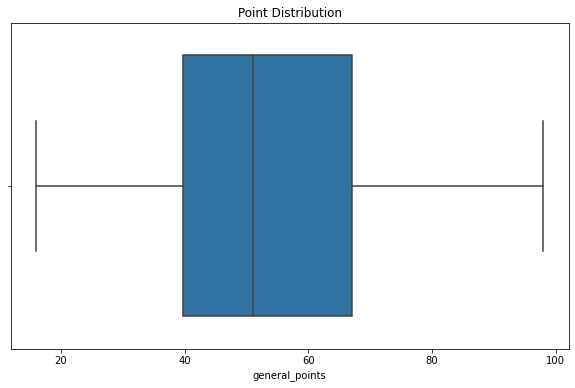

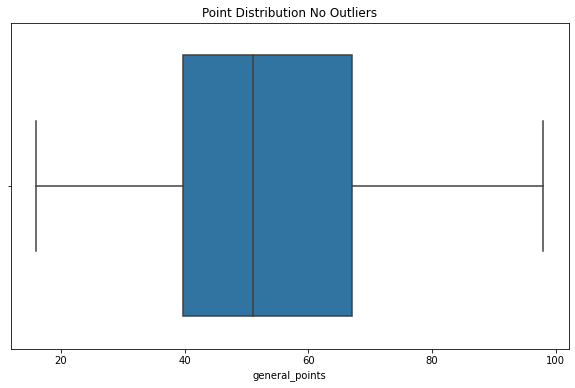

In [10]:
plt.figure(figsize = (10, 6))
sns.boxplot(df['general_points']).set_title('Point Distribution')
mean = df['general_points'].mean()
median = df['general_points'].median()
FirstQuartile = df['general_points'].quantile(0.25)
ThirdQuartile = df['general_points'].quantile(0.75)
Interquartile = scipy.stats.iqr(df['general_points'])
UpperFence = ThirdQuartile + (1.5*Interquartile)
LowerFence = FirstQuartile - (1.5*Interquartile)

print ('==================================')
print ('Statistical Data Summary')
print ('==================================')
print ('Mean : ', mean)
print ('Median : ', median)
print ('1st Quartile : ', FirstQuartile)
print ('3rd Quartile : ', ThirdQuartile)
print ('IQR : ', Interquartile)
print ('Upper Fence : ', UpperFence)
print ('Lower Fence : ', LowerFence)
print ('==================================')

UpperOutliers = []
LowerOutliers = []
StatusUpperOutliers = False
StatusLowerOutliers = False
for x in df['general_points']:
  if (x > UpperFence):
    UpperOutliers.append(x)
    StatusUpperOutliers = True
  elif (x < LowerFence):
    LowerOutliers.append(x)
    StatusLowerOutliers = True
print ()
print ('==================================')
print ('Outliers Data Detection')
print ('==================================')
print ('Upper Outliers Data : ', sorted(UpperOutliers, reverse=False))
print ('Upper Outliers Status : ', StatusUpperOutliers)
print ('Lower Outliers Data : ', sorted(LowerOutliers, reverse=False))
print ('Lower Outliers Status : ', StatusLowerOutliers)
print ('==================================')

plt.figure(figsize = (10, 6))
sns.boxplot(df['general_points'], showfliers = False).set_title('Point Distribution No Outliers')

## Anomaly Team



### What is Anomaly ? 

Based on anadot.com, Anomaly detection (aka outlier analysis) is a step in data mining that identifies data points, events, and/or observations that deviate from a dataset’s normal behavior. Anomalous data can indicate critical incidents, such as a technical glitch, or potential opportunities, for instance a change in consumer behavior. (src : https://www.anodot.com/blog/what-is-anomaly-detection/ )

How do you detect the outliers or What are the methods used for detecting anomalies?

1. Using data visualization(like making use of boxplots, violin plots…etc)

2. Using Statistical methods like Quantile methods(IQR, Q1, Q3), Finding Minimum, Maximum, and median of the data, Z-score, etc.

3. ML algorithms like IsolationForest, LocalOutlierFactor, OneClassSVM, Elliptic Envelope …etc.

(src : https://www.analyticsvidhya.com/blog/2021/04/dealing-with-anomalies-in-the-data/ )

### Which team is an anomaly ?

Based on the result in Boxplot in the above, there is no team which considered as anomaly team based on point distribution. Because there is no outliers in point distribution which visualized by boxplot in above.

# Objective 3

**Which team has the best attack?** 

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 44 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Team                           20 non-null     object 
 1   category                       20 non-null     object 
 2   general_league_position        20 non-null     int64  
 3   finance _live_games_televised  20 non-null     int64  
 4   finance _tv_revenue            20 non-null     int64  
 5   general_matches_played         20 non-null     int64  
 6   general_won                    20 non-null     int64  
 7   general_draw                   20 non-null     int64  
 8   general_lost                   20 non-null     int64  
 9   attack_scored                  20 non-null     int64  
 10  defence_goals_conceeded        20 non-null     int64  
 11  general_goal_difference        20 non-null     int64  
 12  general_points                 20 non-null     int64

## Collect data which contains a meaning in attack

In [12]:
dfAttackData = df[['attack_scored', 'attack_passes',
                   'attack_passes_through','attack_passes_long',
                   'attack_passes_back','attack_crosses',
                   'attack_crosses','attack_corners_taken', 
                   'attack_shots','attack_shots_on_target', 
                   'attack_goals_headed','attack_goals_penalty', 
                   'attack_goals_box','attack_goals_outsidebox', 
                   'attack_goals_counter','attack_goals_freekick']]
dfAttackData

,attack_scored,attack_passes,attack_passes_through,attack_passes_long,attack_passes_back,attack_crosses,attack_crosses,attack_corners_taken,attack_shots,attack_shots_on_target,attack_goals_headed,attack_goals_penalty,attack_goals_box,attack_goals_outsidebox,attack_goals_counter,attack_goals_freekick
0,95,26581,112,1814,4240,783,783,298,683,260,12,3,80,15,5,2
1,89,23638,98,2250,3416,721,721,249,575,226,19,7,84,5,6,1
2,63,25070,146,1774,3874,692,692,215,607,198,8,5,54,9,1,1
3,67,21295,87,2267,3191,643,643,194,537,189,14,4,53,14,5,2
4,73,20805,65,2062,3102,605,605,209,467,170,5,4,62,11,3,3
5,65,19202,63,2242,2634,638,638,200,526,225,4,9,55,10,4,2
6,47,16618,51,2552,2515,622,622,195,477,152,10,4,44,3,5,2
7,54,16494,44,2310,2362,814,814,215,498,169,13,2,45,10,3,0
8,51,17219,88,2335,2593,779,779,210,515,184,9,5,43,8,8,3
9,52,16358,75,2315,2273,630,630,188,441,157,10,5,47,5,3,0


## Find the team who has Best Attack by Find the Highest Mean of Attack Data

### Calculate the mean of all data of each team

In [13]:
dfAttackData['MeanAttackData'] = dfAttackData.mean(axis=1)
dfAttackData

<ipython-input-13-614536655c8d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfAttackData['MeanAttackData'] = dfAttackData.mean(axis=1)


,attack_scored,attack_passes,attack_passes_through,attack_passes_long,attack_passes_back,attack_crosses,attack_crosses,attack_corners_taken,attack_shots,attack_shots_on_target,attack_goals_headed,attack_goals_penalty,attack_goals_box,attack_goals_outsidebox,attack_goals_counter,attack_goals_freekick,MeanAttackData
0,95,26581,112,1814,4240,783,783,298,683,260,12,3,80,15,5,2,2235.3750
1,89,23638,98,2250,3416,721,721,249,575,226,19,7,84,5,6,1,2006.5625
2,63,25070,146,1774,3874,692,692,215,607,198,8,5,54,9,1,1,2088.0625
3,67,21295,87,2267,3191,643,643,194,537,189,14,4,53,14,5,2,1825.3125
4,73,20805,65,2062,3102,605,605,209,467,170,5,4,62,11,3,3,1765.6875
5,65,19202,63,2242,2634,638,638,200,526,225,4,9,55,10,4,2,1657.3125
6,47,16618,51,2552,2515,622,622,195,477,152,10,4,44,3,5,2,1494.9375
7,54,16494,44,2310,2362,814,814,215,498,169,13,2,45,10,3,0,1490.4375
8,51,17219,88,2335,2593,779,779,210,515,184,9,5,43,8,8,3,1551.8125
9,52,16358,75,2315,2273,630,630,188,441,157,10,5,47,5,3,0,1449.3125


### Add Team Name Column to dfAttackData from df

In [14]:
dfAttackData = dfAttackData.join(df['Team'])
dfAttackData

,attack_scored,attack_passes,attack_passes_through,attack_passes_long,attack_passes_back,attack_crosses,attack_crosses,attack_corners_taken,attack_shots,attack_shots_on_target,attack_goals_headed,attack_goals_penalty,attack_goals_box,attack_goals_outsidebox,attack_goals_counter,attack_goals_freekick,MeanAttackData,Team
0,95,26581,112,1814,4240,783,783,298,683,260,12,3,80,15,5,2,2235.3750,Manchester City
1,89,23638,98,2250,3416,721,721,249,575,226,19,7,84,5,6,1,2006.5625,Liverpool
2,63,25070,146,1774,3874,692,692,215,607,198,8,5,54,9,1,1,2088.0625,Chelsea
3,67,21295,87,2267,3191,643,643,194,537,189,14,4,53,14,5,2,1825.3125,Tottenham
4,73,20805,65,2062,3102,605,605,209,467,170,5,4,62,11,3,3,1765.6875,Arsenal
5,65,19202,63,2242,2634,638,638,200,526,225,4,9,55,10,4,2,1657.3125,Manchester United
6,47,16618,51,2552,2515,622,622,195,477,152,10,4,44,3,5,2,1494.9375,Wolverhampton
7,54,16494,44,2310,2362,814,814,215,498,169,13,2,45,10,3,0,1490.4375,Everton
8,51,17219,88,2335,2593,779,779,210,515,184,9,5,43,8,8,3,1551.8125,Leicester
9,52,16358,75,2315,2273,630,630,188,441,157,10,5,47,5,3,0,1449.3125,West Ham


### Find the Highest of Mean Attack Data

In [15]:
dfAttackData['MeanAttackData'].max()

2235.375

In [38]:
dfBestAttackTeam = dfAttackData[dfAttackData['MeanAttackData'] == 2235.375]
dfBestAttackTeam

,attack_scored,attack_passes,attack_passes_through,attack_passes_long,attack_passes_back,attack_crosses,attack_crosses,attack_corners_taken,attack_shots,attack_shots_on_target,attack_goals_headed,attack_goals_penalty,attack_goals_box,attack_goals_outsidebox,attack_goals_counter,attack_goals_freekick,MeanAttackData,Team
0,95,26581,112,1814,4240,783,783,298,683,260,12,3,80,15,5,2,2235.375,Manchester City


# Objective 4

**Which team has the best defence?** 

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 44 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Team                           20 non-null     object 
 1   category                       20 non-null     object 
 2   general_league_position        20 non-null     int64  
 3   finance _live_games_televised  20 non-null     int64  
 4   finance _tv_revenue            20 non-null     int64  
 5   general_matches_played         20 non-null     int64  
 6   general_won                    20 non-null     int64  
 7   general_draw                   20 non-null     int64  
 8   general_lost                   20 non-null     int64  
 9   attack_scored                  20 non-null     int64  
 10  defence_goals_conceeded        20 non-null     int64  
 11  general_goal_difference        20 non-null     int64  
 12  general_points                 20 non-null     int64

## Collect data which contains a meaning in defense

In [18]:
dfDefenceData = df.iloc[:, 34:41]
dfDefenceData

,defence_saves,defence_blocks,defence_interceptions,defence_tackles,defence_tackles_last_man,defence_clearances,defence_clearances_headed
0,58,63,362,518,0,543,295
1,76,78,314,610,2,639,317
2,85,73,351,618,2,593,330
3,121,112,326,626,3,770,411
4,133,118,412,609,2,762,404
5,122,128,355,581,2,785,370
6,100,148,501,720,2,824,464
7,94,85,456,700,4,825,430
8,90,96,436,676,4,945,500
9,148,141,457,723,5,855,397


## Find the team who has Best Defense by Find the Highest Mean of Defense Data

### Calculate the mean of all data of each team

In [19]:
dfDefenceData['MeanDefenceData'] = dfDefenceData.mean(axis=1)
dfDefenceData

,defence_saves,defence_blocks,defence_interceptions,defence_tackles,defence_tackles_last_man,defence_clearances,defence_clearances_headed,MeanDefenceData
0,58,63,362,518,0,543,295,262.714286
1,76,78,314,610,2,639,317,290.857143
2,85,73,351,618,2,593,330,293.142857
3,121,112,326,626,3,770,411,338.428571
4,133,118,412,609,2,762,404,348.571429
5,122,128,355,581,2,785,370,334.714286
6,100,148,501,720,2,824,464,394.142857
7,94,85,456,700,4,825,430,370.571429
8,90,96,436,676,4,945,500,392.428571
9,148,141,457,723,5,855,397,389.428571


### Add Team Name Column to dfAttackData from df

In [20]:
dfDefenceData = dfDefenceData.join(df['Team'])
dfDefenceData

,defence_saves,defence_blocks,defence_interceptions,defence_tackles,defence_tackles_last_man,defence_clearances,defence_clearances_headed,MeanDefenceData,Team
0,58,63,362,518,0,543,295,262.714286,Manchester City
1,76,78,314,610,2,639,317,290.857143,Liverpool
2,85,73,351,618,2,593,330,293.142857,Chelsea
3,121,112,326,626,3,770,411,338.428571,Tottenham
4,133,118,412,609,2,762,404,348.571429,Arsenal
5,122,128,355,581,2,785,370,334.714286,Manchester United
6,100,148,501,720,2,824,464,394.142857,Wolverhampton
7,94,85,456,700,4,825,430,370.571429,Everton
8,90,96,436,676,4,945,500,392.428571,Leicester
9,148,141,457,723,5,855,397,389.428571,West Ham


### Find the Highest of Mean Defence Data

In [21]:
dfDefenceData['MeanDefenceData'].max()

448.14285714285717

In [22]:
dfBestDefenceTeam = dfDefenceData[dfDefenceData['MeanDefenceData'] == 448.14285714285717]
dfBestDefenceTeam

,defence_saves,defence_blocks,defence_interceptions,defence_tackles,defence_tackles_last_man,defence_clearances,defence_clearances_headed,MeanDefenceData,Team
12,95,134,506,714,4,1120,564,448.142857,Newcastle


# Objective 5

**Which team is good in the financial aspect?** 

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 44 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Team                           20 non-null     object 
 1   category                       20 non-null     object 
 2   general_league_position        20 non-null     int64  
 3   finance _live_games_televised  20 non-null     int64  
 4   finance _tv_revenue            20 non-null     int64  
 5   general_matches_played         20 non-null     int64  
 6   general_won                    20 non-null     int64  
 7   general_draw                   20 non-null     int64  
 8   general_lost                   20 non-null     int64  
 9   attack_scored                  20 non-null     int64  
 10  defence_goals_conceeded        20 non-null     int64  
 11  general_goal_difference        20 non-null     int64  
 12  general_points                 20 non-null     int64

## Collect data which contains a meaning in finance

In [24]:
dfFinanceData = df[['finance _tv_revenue','finance _team_market','finance _market_average']]
dfFinanceData

,finance _tv_revenue,finance _team_market,finance _market_average
0,150986355,1003200000,39987200
1,152425146,836440000,34848000
2,146030216,779460000,29981600
3,145230801,735240000,29409600
4,142193180,701800000,26989600
5,142512868,550440000,22017600
6,127165114,369600000,16068800
7,128603905,305360000,11748000
8,123328078,284240000,10929600
9,122528663,234212000,9011200


In [25]:
dfFinanceData = dfFinanceData.join(df['Team'])
dfFinanceData

,finance _tv_revenue,finance _team_market,finance _market_average,Team
0,150986355,1003200000,39987200,Manchester City
1,152425146,836440000,34848000,Liverpool
2,146030216,779460000,29981600,Chelsea
3,145230801,735240000,29409600,Tottenham
4,142193180,701800000,26989600,Arsenal
5,142512868,550440000,22017600,Manchester United
6,127165114,369600000,16068800,Wolverhampton
7,128603905,305360000,11748000,Everton
8,123328078,284240000,10929600,Leicester
9,122528663,234212000,9011200,West Ham


## Condition Based on Finance TV Revenue

In [40]:
dfFinanceTVRevenue = dfFinanceData[['finance _tv_revenue','Team']]
dfFinanceTVRevenue = dfFinanceTVRevenue.sort_values(by='finance _tv_revenue', ascending = False)
dfFinanceTVRevenue.reset_index(drop=True)

,finance _tv_revenue,Team
0,152425146,Liverpool
1,150986355,Manchester City
2,146030216,Chelsea
3,145230801,Tottenham
4,142512868,Manchester United
5,142193180,Arsenal
6,128603905,Everton
7,127165114,Wolverhampton
8,123328078,Leicester
9,122528663,West Ham


[Text(0.5, 1.0, 'Finance TV Revenue')]

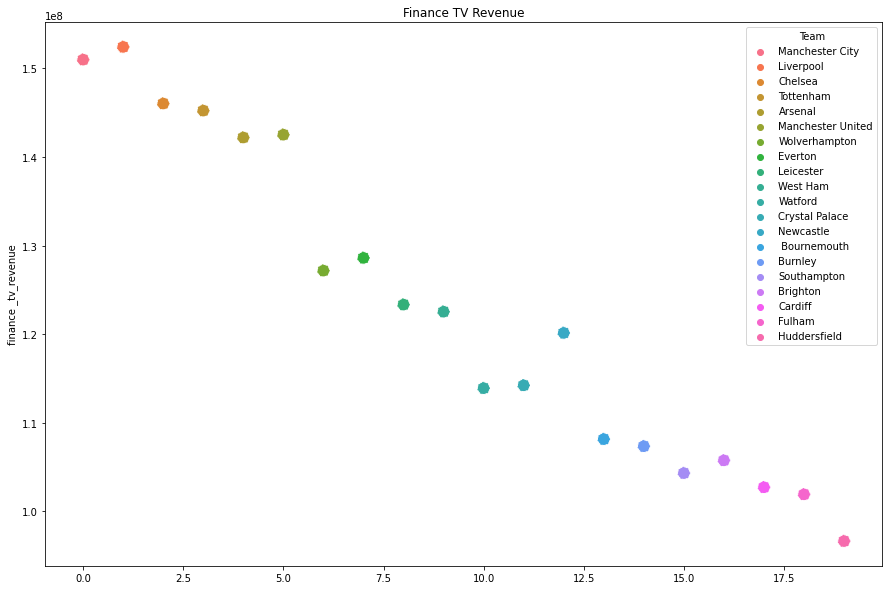

In [26]:
fig, ax = plt.subplots(figsize=(15,10))


sns.scatterplot(
    x=dfFinanceData.index, y="finance _tv_revenue",
    linestyle='--',
    data=dfFinanceData,
    s=160,
    ax=ax,
    hue = df['Team'],
).set(title='Finance TV Revenue')

## Condition Based on Finance Team Market

In [41]:
dfFinanceTeamMarket = dfFinanceData[['finance _team_market','Team']]
dfFinanceTeamMarket = dfFinanceTeamMarket.sort_values(by='finance _team_market', ascending = False)
dfFinanceTeamMarket.reset_index(drop=True)

,finance _team_market,Team
0,1003200000,Manchester City
1,836440000,Liverpool
2,779460000,Chelsea
3,735240000,Tottenham
4,701800000,Arsenal
5,550440000,Manchester United
6,369600000,Wolverhampton
7,305360000,Everton
8,284240000,Leicester
9,234212000,West Ham


[Text(0.5, 1.0, 'Finance Team Market')]

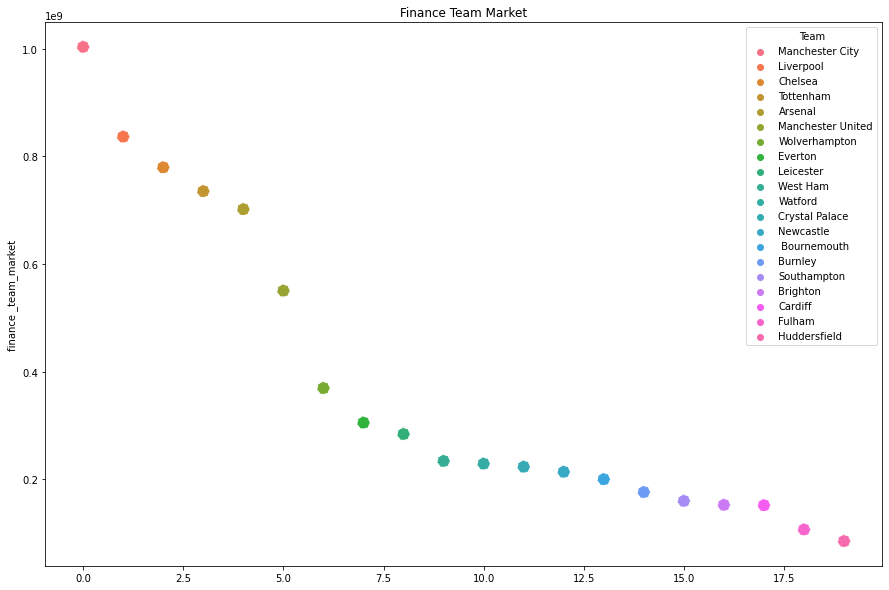

In [27]:
fig, ax = plt.subplots(figsize=(15,10))


sns.scatterplot(
    x=dfFinanceData.index, y="finance _team_market",
    linestyle='--',
    data=dfFinanceData,
    s=160,
    ax=ax,
    hue = df['Team'],
).set(title='Finance Team Market')

## Condition Based on Finance Market Average

In [42]:
dfFinanceMarketAverage = dfFinanceData[['finance _market_average','Team']]
dfFinanceMarketAverage = dfFinanceMarketAverage.sort_values(by='finance _market_average', ascending = False)
dfFinanceMarketAverage.reset_index(drop=True)

,finance _market_average,Team
0,39987200,Manchester City
1,34848000,Liverpool
2,29981600,Chelsea
3,29409600,Tottenham
4,26989600,Arsenal
5,22017600,Manchester United
6,16068800,Wolverhampton
7,11748000,Everton
8,10929600,Leicester
9,10700800,Newcastle


[Text(0.5, 1.0, 'Finance Market Average')]

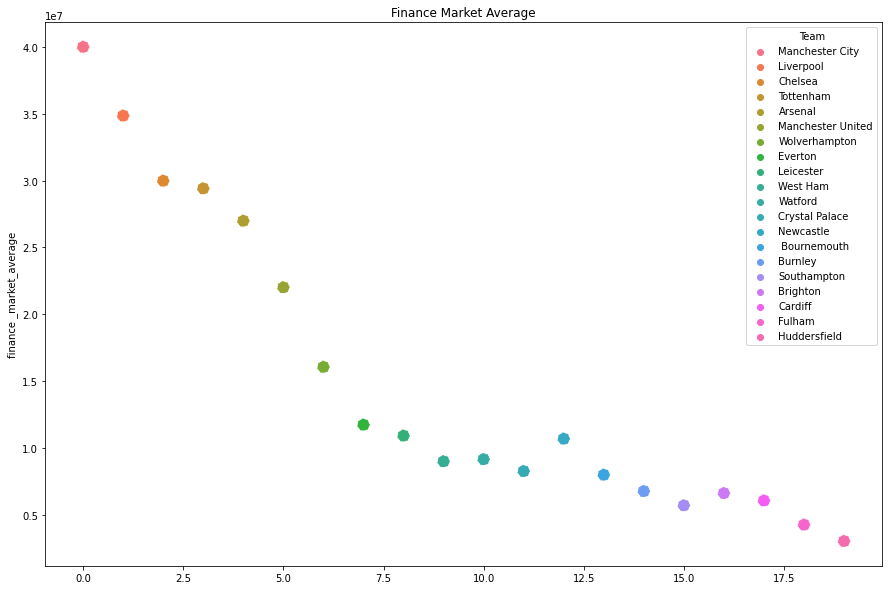

In [28]:
fig, ax = plt.subplots(figsize=(15,10))


sns.scatterplot(
    x=dfFinanceData.index, y="finance _market_average",
    linestyle='--',
    data=dfFinanceData,
    s=160,
    ax=ax,
    hue = df['Team'],
).set(title='Finance Market Average')

# OBJECTIVE 6

DO CREATIVITY

## Scatter Plot MeanAttackData vs MeanDefenceData

In [29]:
df= df.join(dfDefenceData['MeanDefenceData'])
df= df.join(dfAttackData['MeanAttackData'])
df

,Team,category,general_league_position,finance _live_games_televised,finance _tv_revenue,general_matches_played,general_won,general_draw,general_lost,attack_scored,...,defence_interceptions,defence_tackles,defence_tackles_last_man,defence_clearances,defence_clearances_headed,defence_penalty_conceeded,attack_posession,attack_pass_accuracy,MeanDefenceData,MeanAttackData
0,Manchester City,Champions League,1,26,150986355,38,32,2,4,95,...,362,518,0,543,295,4,64.0,89.0,262.714286,2235.3750
1,Liverpool,Champions League,2,29,152425146,38,30,7,1,89,...,314,610,2,639,317,1,58.8,84.4,290.857143,2006.5625
2,Chelsea,Champions League Qualification,3,25,146030216,38,21,9,8,63,...,351,618,2,593,330,2,59.9,87.6,293.142857,2088.0625
3,Tottenham,Champions League Qualification,4,26,145230801,38,23,2,13,67,...,326,626,3,770,411,5,56.7,83.2,338.428571,1825.3125
4,Arsenal,Europa League,5,25,142193180,38,21,7,10,73,...,412,609,2,762,404,7,56.1,83.3,348.571429,1765.6875
5,Manchester United,Europa League,6,27,142512868,38,19,9,10,65,...,355,581,2,785,370,6,53.3,82.3,334.714286,1657.3125
6,Wolverhampton,Europa League Qualification,7,15,127165114,38,16,9,13,47,...,501,720,2,824,464,4,47.4,78.2,394.142857,1494.9375
7,Everton,No UEFA Competitions,8,18,128603905,38,15,9,14,54,...,456,700,4,825,430,5,51.0,77.3,370.571429,1490.4375
8,Leicester,No UEFA Competitions,9,15,123328078,38,15,7,16,51,...,436,676,4,945,500,5,50.8,79.2,392.428571,1551.8125
9,West Ham,No UEFA Competitions,10,16,122528663,38,15,7,16,52,...,457,723,5,855,397,5,49.0,78.7,389.428571,1449.3125


[Text(0.5, 1.0, 'MeanAttackData VS MeanDefenceData')]

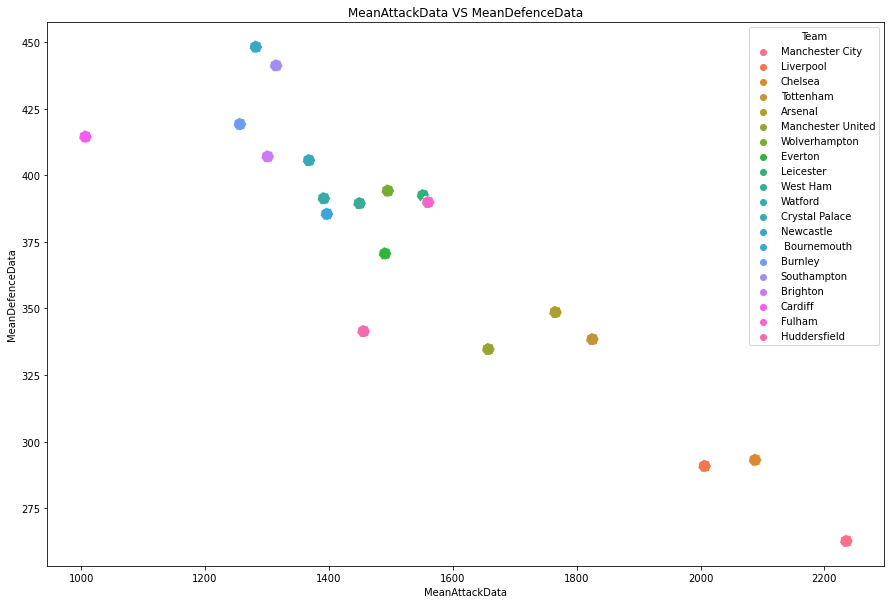

In [30]:
fig, ax = plt.subplots(figsize=(15,10))


sns.scatterplot(
    x='MeanAttackData', y="MeanDefenceData",
    linestyle='--',
    data=df,
    s=160,
    ax=ax,
    hue = df['Team'],
).set(title='MeanAttackData VS MeanDefenceData')

[Text(0.5, 1.0, 'MeanAttackData VS MeanDefenceData by Category')]

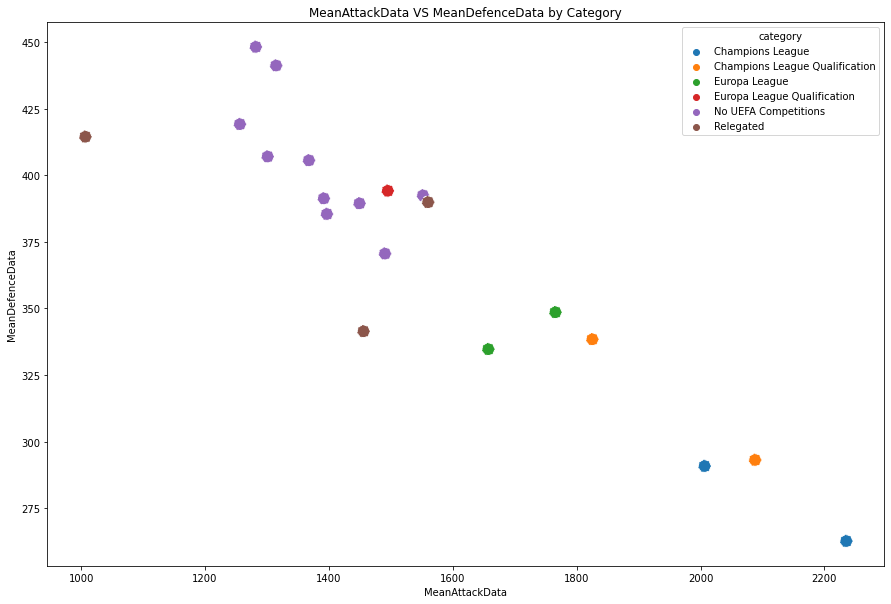

In [31]:
fig, ax = plt.subplots(figsize=(15,10))


sns.scatterplot(
    x='MeanAttackData', y="MeanDefenceData",
    linestyle='--',
    data=df,
    s=160,
    ax=ax,
    hue = df['category'],
).set(title='MeanAttackData VS MeanDefenceData by Category')

## Scatter Plot finance_live_games_televised vs finance_tv_revenue

[Text(0.5, 1.0, 'finance_live_games_televised vs finance_tv_revenue')]

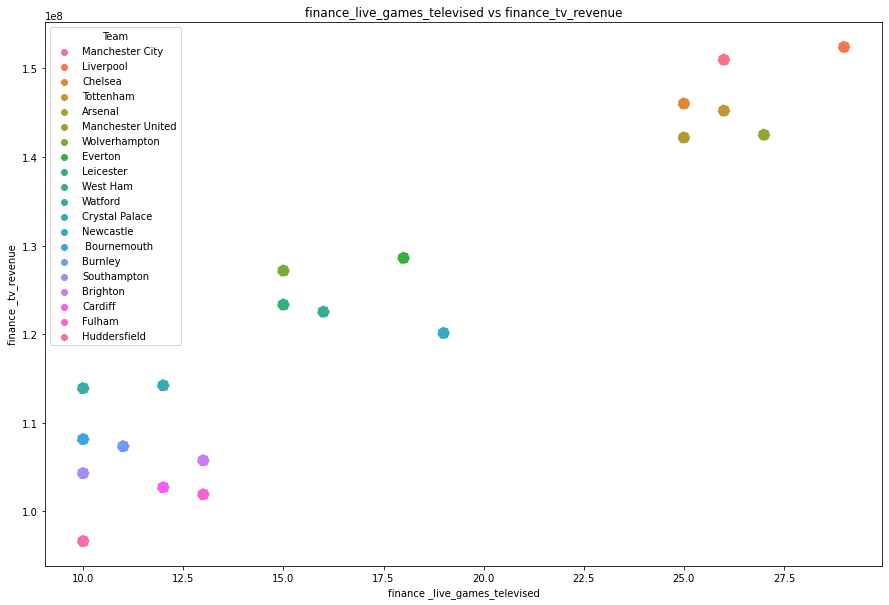

In [32]:
fig, ax = plt.subplots(figsize=(15,10))


sns.scatterplot(
    x='finance _live_games_televised', y="finance _tv_revenue",
    linestyle='--',
    data=df,
    s=160,
    ax=ax,
    hue = df['Team'],
).set(title='finance_live_games_televised vs finance_tv_revenue')

[Text(0.5, 1.0, 'finance_live_games_televised vs finance_tv_revenue by category')]

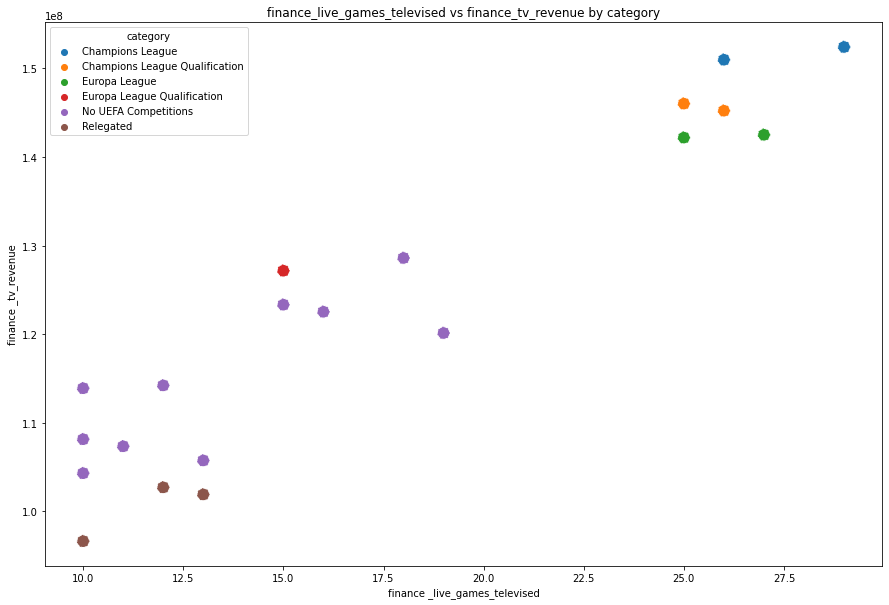

In [33]:
fig, ax = plt.subplots(figsize=(15,10))


sns.scatterplot(
    x='finance _live_games_televised', y="finance _tv_revenue",
    linestyle='--',
    data=df,
    s=160,
    ax=ax,
    hue = df['category'],
).set(title='finance_live_games_televised vs finance_tv_revenue by category')

## Scatter plot between attack_shots, attack_shots_on_target, and attack_scored

[Text(0.5, 1.0, 'attack_shots_on_target vs attack shots')]

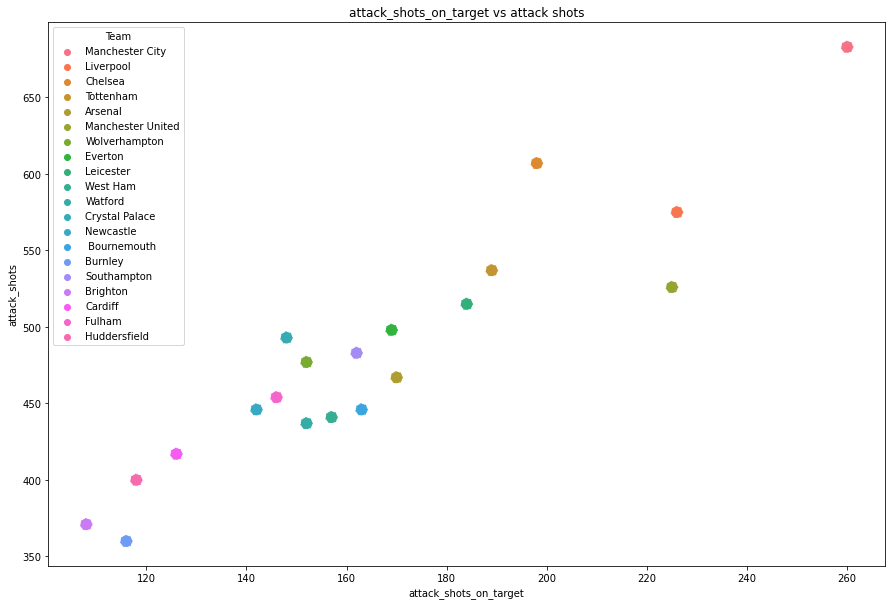

In [34]:
fig, ax = plt.subplots(figsize=(15,10))


sns.scatterplot(
    x='attack_shots_on_target', y="attack_shots",
    linestyle='--',
    data=df,
    s=160,
    ax=ax,
    hue = df['Team'],
).set(title='attack_shots_on_target vs attack shots')

[Text(0.5, 1.0, 'attack shots vs attack_scored')]

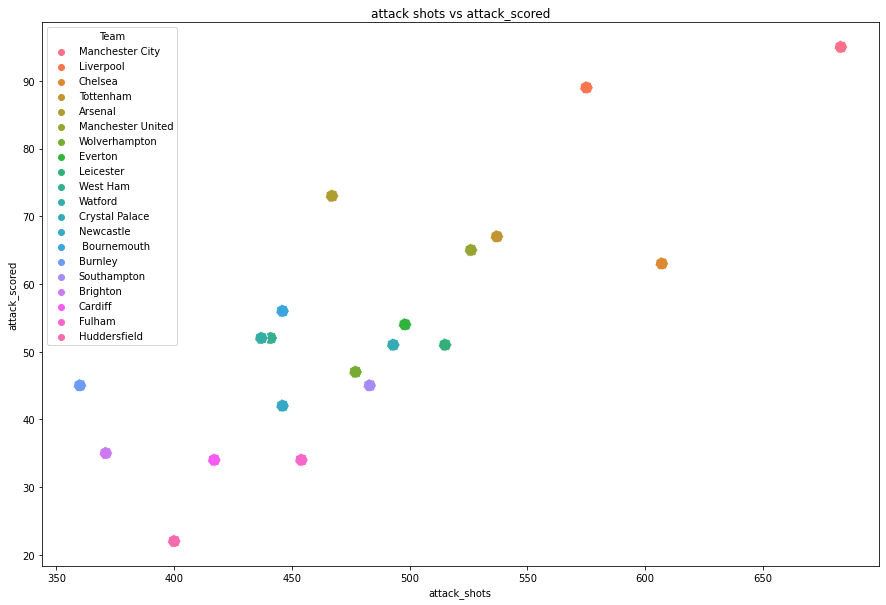

In [35]:
fig, ax = plt.subplots(figsize=(15,10))


sns.scatterplot(
    x='attack_shots', y="attack_scored",
    linestyle='--',
    data=df,
    s=160,
    ax=ax,
    hue = df['Team'],
).set(title='attack shots vs attack_scored')

[Text(0.5, 1.0, 'attack_shots_on_target vs attack_scored')]

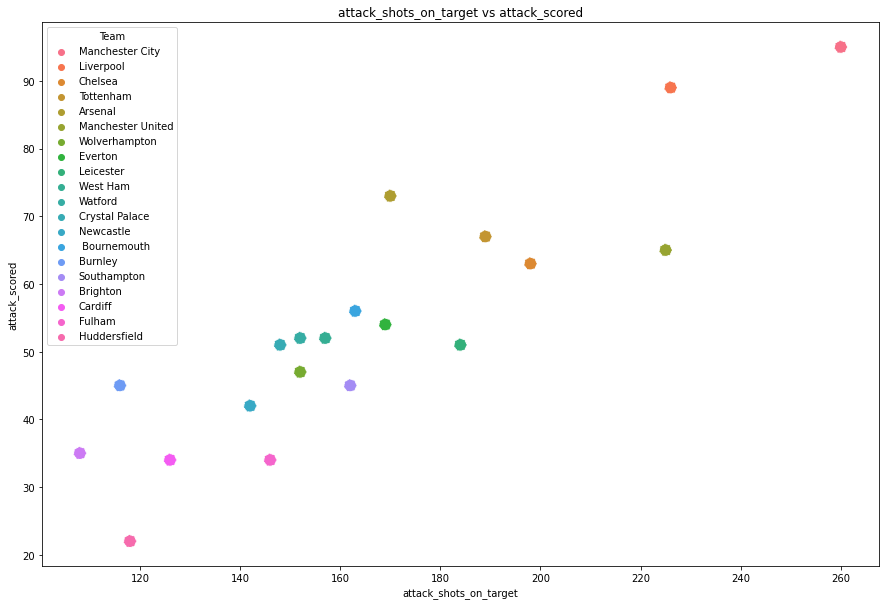

In [36]:
fig, ax = plt.subplots(figsize=(15,10))


sns.scatterplot(
    x='attack_shots_on_target', y="attack_scored",
    linestyle='--',
    data=df,
    s=160,
    ax=ax,
    hue = df['Team'],
).set(title='attack_shots_on_target vs attack_scored')

## Yellow Card vs Red Card in Each Team

[Text(0.5, 1.0, 'Yellow Card vs Red Card in Each Team')]

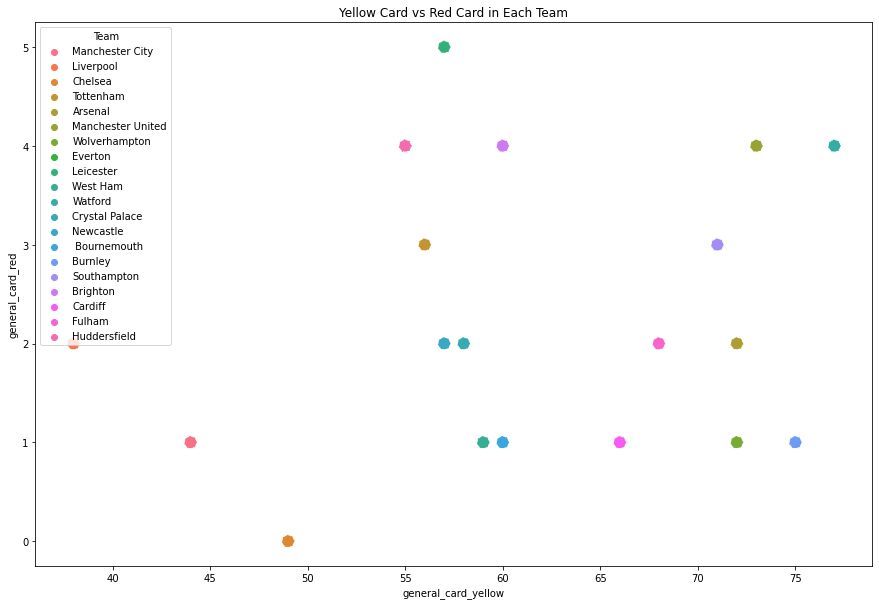

In [37]:
fig, ax = plt.subplots(figsize=(15,10))


sns.scatterplot(
    x='general_card_yellow', y="general_card_red",
    linestyle='--',
    data=df,
    s=160,
    ax=ax,
    hue = df['Team'],
).set(title='Yellow Card vs Red Card in Each Team')